author: Songyang Cheng

date: 1025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
%matplotlib inline

## Pedestrian Count Distribution on Weekday/Weekends

In [2]:
pedestrian = pd.read_csv('Upper_State_St._Pedestrian_Counts.csv')

In [3]:
from time import time,localtime,strftime

In [4]:
names = pedestrian.Time.str.split(' ',expand=True)
names.columns = ['date', 'Hour']
pedestrian = pedestrian.join(names)
pedestrian["date"] = pd.to_datetime(pedestrian["date"])
pedestrian["day_of_week"] = pedestrian["date"].dt.weekday_name
pedestrian["day_of_week"].value_counts()

Monday       1272
Friday       1272
Wednesday    1248
Sunday       1248
Tuesday      1248
Thursday     1247
Saturday     1224
Name: day_of_week, dtype: int64

In [5]:
ped_wkd = pedestrian[(pedestrian['day_of_week'] == 'Monday')|
                     (pedestrian['day_of_week'] == 'Tuesday')|
                     (pedestrian['day_of_week'] == 'Wednesday')|
                     (pedestrian['day_of_week'] == 'Thursday') ]
ped_fri = pedestrian[(pedestrian['day_of_week'] == 'Friday')]
ped_sat = pedestrian[(pedestrian['day_of_week'] == 'Saturday')]
ped_sun = pedestrian[(pedestrian['day_of_week'] == 'Sunday')]

In [6]:
def column_concat_df(wkd, fri, sat, sun, col_name):
    df = pd.concat([wkd[col_name].reset_index(drop=True), 
                    fri[col_name].reset_index(drop=True),
                    sat[col_name].reset_index(drop=True),
                    sun[col_name].reset_index(drop=True)], 
                     axis=1)
    df.columns = ["Weekday", "Friday", "Saturday", "Sunday"]
    return df

## Relationship Across Time betwee Traffic Light Cycle and Pedestrain Volume 

In [7]:
programs = pd.read_excel('te_cycle_data.xlsx', sheet_name='Programs')
patterns = pd.read_excel('te_cycle_data.xlsx', sheet_name='Patterns')

In [8]:
programs['Pattern'] = programs['Pattern'].replace('Flash', 0)
programs['Pattern'].astype('int64')
programs['Pattern'].head()

0    0
1    6
2    3
3    1
4    5
Name: Pattern, dtype: int64

In [9]:
combined = pd.merge(programs, patterns, on=['Intersection', 'Pattern'], how="left")
Dayton = combined[combined['Intersection'] == 'State and Dayton']
Gorham = combined[combined['Intersection'] == 'State and Gorham']
Johnson = combined[combined['Intersection'] == 'State and Johnson']

In [10]:
Dayton_weekday = Dayton[Dayton['Day Type'] == 'Monday - Thursday']
Dayton_fri = Dayton[Dayton['Day Type'] == 'Friday']
Dayton_sat = Dayton[Dayton['Day Type'] == 'Saturday']
Dayton_sun = Dayton[Dayton['Day Type'] == 'Sunday']

Johnson_wkd = Johnson[Johnson['Day Type'] == 'Monday - Thursday']
Johnson_fri = Johnson[Johnson['Day Type'] == 'Friday']
Johnson_sat = Johnson[Johnson['Day Type'] == 'Saturday']
Johnson_sun = Johnson[Johnson['Day Type'] == 'Sunday']

Gorham_wkd = Gorham[Gorham['Day Type'] == 'Monday - Thursday']
Gorham_fri = Gorham[Gorham['Day Type'] == 'Friday']
Gorham_sat = Gorham[Gorham['Day Type'] == 'Saturday']
Gorham_sun = Gorham[Gorham['Day Type'] == 'Sunday']

In [11]:
import warnings
warnings.filterwarnings("ignore")

## Green Lights Cycle

In [12]:
pattern_list = ['Pattern', 'Total Cycle Time (s)',
                'Main Street Red (s)', 'Main Street Yellow (s)', 'Main Street Green (s)', 'Main Street Total Cycle Time (s)',
                'Cross Street Red (s)', 'Cross Street Yellow (s)', 'Cross Street Green (s)', 'Cross Street Total Cycle Time (s)']

In [13]:
def constructArr(pat_name, df1, df2=None, df3=None, df4=None):
    length = len(pat_name)/2
    assert length <= 4
    if length == 2:
        assert (df2 is not None)&(df3 is None)&(df4 is None)
    elif length == 3:
        assert (df2 is not None)&(df3 is None)&(df4 is None)
    else:
        assert (df2 is not None)&(df3 is not None)&(df4 is not None)  
    
    if length == 2:
        data = np.array([[float(df1["Main Street Red (s)"]), float(df1['Cross Street Red (s)']), 
                  float(df2["Main Street Red (s)"]), float(df2['Cross Street Red (s)'])], 
                 [float(df1["Main Street Yellow (s)"]), float(df1['Cross Street Yellow (s)']), 
                  float(df2["Main Street Yellow (s)"]), float(df2['Cross Street Yellow (s)'])],
                [float(df1["Main Street Green (s)"]), float(df1['Cross Street Green (s)']), 
                 float(df2["Main Street Green (s)"]), float(df2['Cross Street Green (s)'])]])
        
        percentages = np.array([
                        [float(df1["Main Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Green (s)"]/df1['Total Cycle Time (s)'])*100], 
                        [float(df1["Cross Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Green (s)"]/df1['Total Cycle Time (s)'])*100],
                       [float(df2["Main Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df2["Cross Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Green (s)"]/df2['Total Cycle Time (s)'])*100]
                       ])
        y_pos = [0, 0.08, 0.25, 0.33]
    elif length == 4:
        data = np.array([[float(df1["Main Street Red (s)"]), float(df1['Cross Street Red (s)']), 
                  float(df2["Main Street Red (s)"]), float(df2['Cross Street Red (s)']), 
                    float(df3["Main Street Red (s)"]), float(df3['Cross Street Red (s)']), 
                  float(df4["Main Street Red (s)"]), float(df4['Cross Street Red (s)'])], 
                 [float(df1["Main Street Yellow (s)"]), float(df1['Cross Street Yellow (s)']), 
                  float(df2["Main Street Yellow (s)"]), float(df2['Cross Street Yellow (s)']),
                 float(df3["Main Street Yellow (s)"]), float(df3['Cross Street Yellow (s)']), 
                  float(df4["Main Street Yellow (s)"]), float(df4['Cross Street Yellow (s)'])],
                [float(df1["Main Street Green (s)"]), float(df1['Cross Street Green (s)']), 
                 float(df2["Main Street Green (s)"]), float(df2['Cross Street Green (s)']),
                float(df3["Main Street Green (s)"]), float(df3['Cross Street Green (s)']), 
                 float(df4["Main Street Green (s)"]), float(df4['Cross Street Green (s)'])]])
        
        percentages = np.array([
                        [float(df1["Main Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Green (s)"]/df1['Total Cycle Time (s)'])*100], 
                        [float(df1["Cross Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Green (s)"]/df1['Total Cycle Time (s)'])*100],
                       [float(df2["Main Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df2["Cross Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df3["Main Street Red (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Main Street Yellow (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Main Street Green (s)"]/df3['Total Cycle Time (s)'])*100], 
                        [float(df3["Cross Street Red (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Cross Street Yellow (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Cross Street Green (s)"]/df3['Total Cycle Time (s)'])*100],
                       [float(df4["Main Street Red (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Main Street Yellow (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Main Street Green (s)"]/df4['Total Cycle Time (s)'])*100], 
                        [float(df4["Cross Street Red (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Cross Street Yellow (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Cross Street Green (s)"]/df4['Total Cycle Time (s)'])*100]
                       ])
        y_pos = [0, 0.08, 0.25, 0.33, 0.5, 0.58, 0.75, 0.83]
        
    return data, percentages, y_pos

In [14]:
def visPattern(pat_name, data, percentages, xlab, title, y_pos, figsize):
    segments = 3
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    colors1 =['red', 'yellow', 'green']
    patch_handles = []
    left = np.zeros(len(pat_name)) # left alignment of data starts at zero

    for i, d in enumerate(data):
        patch_handles.append(ax.barh(y=y_pos, width=d, height=0.05, left=left, color=colors1[i], align='center'))
        # accumulate the left-hand offsets
        left += d

    # go through all of the bar segments and annotate
    for j in range(len(patch_handles)):
        for i, patch in enumerate(patch_handles[j].get_children()):
            bl = patch.get_xy()
            x = 0.5*patch.get_width() + bl[0]
            y = 0.5*patch.get_height() + bl[1]
            ax.text(x,y, "%.1f%%" % (percentages[i,j]), ha='center')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(pat_name)
    ax.set_xlabel(xlab)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

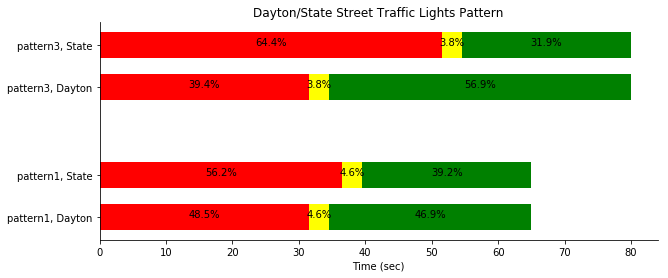

In [15]:
Dayton_cycle = patterns[patterns['Intersection'] == 'State and Dayton']
Dayton_cycle = Dayton_cycle[pattern_list]
Dayton_cycle['Main Street Red (s)'] +=  Dayton_cycle['Cross Street Total Cycle Time (s)']
Dayton_cycle['Cross Street Red (s)'] += Dayton_cycle['Main Street Total Cycle Time (s)']
Dayton_pat = ('pattern1, Dayton', 'pattern1, State', 'pattern3, Dayton', 'pattern3, State')
dayton_data, dayton_pctg, dayton_y = constructArr(Dayton_pat, Dayton_cycle[Dayton_cycle['Pattern'] == 1], 
                                                 Dayton_cycle[Dayton_cycle['Pattern'] == 3])
visPattern(Dayton_pat, dayton_data, dayton_pctg, 'Time (sec)', 
           "Dayton/State Street Traffic Lights Pattern", dayton_y, (10,4) )

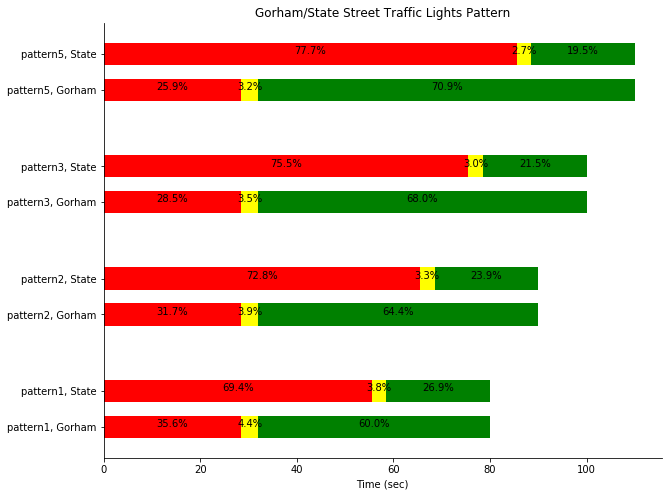

In [16]:
Gorham_cycle = patterns[patterns['Intersection'] == 'State and Gorham']
Gorham_cycle = Gorham_cycle[pattern_list]
Gorham_cycle['Main Street Red (s)'] +=  Gorham_cycle['Cross Street Total Cycle Time (s)']
Gorham_cycle['Cross Street Red (s)'] += Gorham_cycle['Main Street Total Cycle Time (s)']
Gorham_pat = ('pattern1, Gorham', 'pattern1, State', 
              'pattern2, Gorham', 'pattern2, State', 
              'pattern3, Gorham', 'pattern3, State', 
              'pattern5, Gorham', 'pattern5, State')
gorham_data, gorham_pctg, gorham_y = constructArr(Gorham_pat, Gorham_cycle[Gorham_cycle['Pattern'] == 1], 
                                                 Gorham_cycle[Gorham_cycle['Pattern'] == 2], 
                                                  Gorham_cycle[Gorham_cycle['Pattern'] == 3], 
                                                 Gorham_cycle[Gorham_cycle['Pattern'] == 5])
visPattern(Gorham_pat, gorham_data, gorham_pctg, 'Time (sec)', 
           "Gorham/State Street Traffic Lights Pattern", gorham_y, (10, 8) )

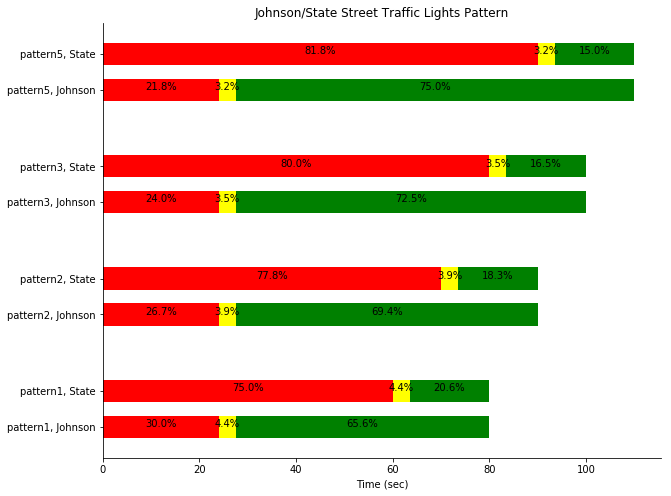

In [17]:
Johnson_cycle = patterns[patterns['Intersection'] == 'State and Johnson']
Johnson_cycle = Johnson_cycle[pattern_list]
Johnson_cycle['Main Street Red (s)'] +=  Johnson_cycle['Cross Street Total Cycle Time (s)']
Johnson_cycle['Cross Street Red (s)'] += Johnson_cycle['Main Street Total Cycle Time (s)']
Johnson_pat = ('pattern1, Johnson', 'pattern1, State', 
              'pattern2, Johnson', 'pattern2, State', 
              'pattern3, Johnson', 'pattern3, State', 
              'pattern5, Johnson', 'pattern5, State')
johnson_data, johnson_pctg, johnson_y = constructArr(Johnson_pat, Johnson_cycle[Johnson_cycle['Pattern'] == 1], 
                                                 Johnson_cycle[Johnson_cycle['Pattern'] == 2], 
                                                  Johnson_cycle[Johnson_cycle['Pattern'] == 3], 
                                                 Johnson_cycle[Johnson_cycle['Pattern'] == 5])
visPattern(Johnson_pat, johnson_data, johnson_pctg, 'Time (sec)', 
           "Johnson/State Street Traffic Lights Pattern", johnson_y, (10, 8) )

## Metric to Measure How Good A Light Cycle is

In [18]:
Dayton_cycle

,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
0,1,65,31.5,3.0,30.5,35,36.5,3.0,25.5,30
1,3,80,31.5,3.0,45.5,50,51.5,3.0,25.5,30
2,5,80,31.5,3.0,45.5,50,51.5,3.0,25.5,30
3,6,65,31.5,3.0,30.5,35,36.5,3.0,25.5,30


In [19]:
Dayton_cycle['avg_wait_main'] = Dayton_cycle['Main Street Red (s)']*Dayton_cycle['Main Street Red (s)']\
    /(2*Dayton_cycle['Total Cycle Time (s)'])
Dayton_cycle['avg_wait_cross'] = Dayton_cycle['Cross Street Red (s)']*Dayton_cycle['Cross Street Red (s)']\
    /(2*Dayton_cycle['Total Cycle Time (s)'])
Dayton_cycle

,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross
0,1,65,31.5,3.0,30.5,35,36.5,3.0,25.5,30,7.632692,10.248077
1,3,80,31.5,3.0,45.5,50,51.5,3.0,25.5,30,6.201562,16.576563
2,5,80,31.5,3.0,45.5,50,51.5,3.0,25.5,30,6.201562,16.576563
3,6,65,31.5,3.0,30.5,35,36.5,3.0,25.5,30,7.632692,10.248077


In [20]:
pedestrian[['SS_22_State_St__North_Side', 'SS_23_State_St__South_Side', 'Hour', 'date', 'day_of_week']].head()

,SS_22_State_St__North_Side,SS_23_State_St__South_Side,Hour,date,day_of_week
0,80,113,08:00:00,2018-08-20,Monday
1,446,350,12:00:00,2018-08-24,Friday
2,129,108,09:00:00,2018-08-20,Monday
3,391,248,13:00:00,2018-08-24,Friday
4,335,212,14:00:00,2018-08-24,Friday


Assumptions:
1. 2/5 pedestrians will go across both Main Street and Cross Street, 2/5 pedestrians will only go across Main Street (go along State Street)
    1/5 pedestrians will go across only State Street

In [22]:
s22_wkd_sum = ped_wkd.groupby(ped_wkd.Hour)["SS_22_State_St__North_Side"].sum()
s23_wkd_sum = ped_wkd.groupby(ped_wkd.Hour)["SS_23_State_St__South_Side"].sum()
dayton_wkd_sum = s22_wkd_sum + s23_wkd_sum
s22_wkd_sum.head(2), s23_wkd_sum.head(2), dayton_wkd_sum.head(2)

(Hour
 00:00:00    14229
 01:00:00    11208
 Name: SS_22_State_St__North_Side, dtype: int64, Hour
 00:00:00    9462
 01:00:00    5767
 Name: SS_23_State_St__South_Side, dtype: int64, Hour
 00:00:00    23691
 01:00:00    16975
 dtype: int64)

In [23]:
def compare(ped_idx, cycle):
#     print("ped", ped_idx[:2])
#     print("cycle hr", cycle.hour)
    if int(ped_idx[:2]) < cycle.hour:
        return -1
    elif int(ped_idx[:2]) == cycle.hour and int(ped_idx[3:5]) < cycle.minute:
        return -1
    elif int(ped_idx[:2]) == cycle.hour and int(ped_idx[3:5]) == cycle.minute:
        return 0
    else:
        return 1

In [24]:
waitTime = []
for i in range(24):
    for j in range(len(Dayton_weekday['Start Time'])-1, -1, -1):
        cmp = compare(dayton_wkd_sum.index[i], Dayton_weekday['Start Time'][j])
        if cmp > 0:
            waitTime.append(Dayton_weekday.Pattern[j])
            break
        
waitTime.append(waitTime[-1])
waitTime

[0, 0, 0, 0, 0, 0, 6, 3, 3, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 6, 6, 6, 6, 6]

In [25]:
waitTime_series = pd.Series(waitTime)
waitTime_series = pd.Series(waitTime, index=dayton_wkd_sum.index)
waitTime_series.head()

Hour
00:00:00    0
01:00:00    0
02:00:00    0
03:00:00    0
04:00:00    0
dtype: int64

In [26]:
tmp = pd.concat([dayton_wkd_sum, waitTime_series], axis=1)
tmp['Hour'] = tmp.index
tmp.columns = ['Count','Pattern','Hour']
tmp.head(5)

,Count,Pattern,Hour
Hour,,,
00:00:00,23691,0,00:00:00
01:00:00,16975,0,01:00:00
02:00:00,10607,0,02:00:00
03:00:00,2406,0,03:00:00
04:00:00,1509,0,04:00:00


In [27]:
dayton_wait_wkd =  pd.merge(tmp, Dayton_cycle, on=['Pattern'], how="left")
dayton_wait_wkd.tail()

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross
19,108295,6,19:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077
20,88262,6,20:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077
21,71878,6,21:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077
22,53681,6,22:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077
23,36138,6,23:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077


In [28]:
dayton_wait_wkd['total_wait_main'] = dayton_wait_wkd['avg_wait_main']*dayton_wait_wkd.Count*3/5
dayton_wait_wkd['total_wait_cross'] = dayton_wait_wkd['avg_wait_cross']*dayton_wait_wkd.Count*4/5
dayton_wait_wkd

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross
0,23691,0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16975,0,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10607,0,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2406,0,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1509,0,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2870,0,05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10066,6,06:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,46098.408462,8.252571e+04
7,24591,3,07:00:00,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0,6.201562,16.576563,91501.574062,3.261074e+05
8,33538,3,08:00:00,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0,6.201562,16.576563,124792.801875,4.447558e+05
9,38773,1,09:00:00,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0,7.632692,10.248077,177565.427308,3.178789e+05


In [29]:
dayton_wait_wkd['avg_wait_main'] = dayton_wait_wkd['avg_wait_main'].fillna(0)
dayton_wait_wkd['avg_wait_cross'] = dayton_wait_wkd['avg_wait_cross'].fillna(0)
dayton_wait_wkd['total_wait_main'] = dayton_wait_wkd['total_wait_main'].fillna(0)
dayton_wait_wkd['total_wait_cross'] = dayton_wait_wkd['total_wait_cross'].fillna(0)
dayton_wait_wkd.head()

,Count,Pattern,Hour,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s),avg_wait_main,avg_wait_cross,total_wait_main,total_wait_cross
0,23691,0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,16975,0,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,10607,0,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,2406,0,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1509,0,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [30]:
def annot_max(x,y, ax=None):
    maxIxVal = np.argmax(y);
    zeroBasedIx = np.argwhere(y.index==maxIxVal).flatten()[0];
    xmax = x[zeroBasedIx];
    ymax = y.max()
    text = "x={:s}, count={:.2f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="arc3,rad=0.1")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.98,0.99), **kw)

In [31]:
import math
def plot_waitTime(df, df_Hour, df_total_wait_main, df_total_wait_cross, title, title2):
    fig, axes = plt.subplots(ncols=2, figsize=(20,6), sharex=True, sharey=True)
    
    ax2 = axes[0]
    ax2.plot(df_Hour, df_total_wait_main)
    ax2.set_title(title, fontsize=20)
    ax2.set_xticklabels(df_Hour, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Average Wait Time (Hour) crossing State St", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(df_Hour, df_total_wait_main, ax2)
    
    ax = axes[1]
    ax.plot(df_Hour, df_total_wait_cross)
    ax.set_title(title2, fontsize=20)
    ax.set_xticklabels(df_Hour, rotation=90)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Average Wait Time (Hour) crossing Dayton St", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    annot_max(df_Hour, df_total_wait_cross, ax)

Assumption:
2. Define anger index = 1/3000*(waiting time)^2

In [33]:
def anger_index(x):
    return 1/3000*np.power(x, 2)

In [34]:
def plot_anger(df, df_Hour, df_total_wait_main, df_total_wait_cross, title, title2):
    fig, axes = plt.subplots(ncols=2, figsize=(20,6), sharex=True, sharey=True)
    
    ax2 = axes[0]
    ax2.plot(df_Hour, df_total_wait_main)
    ax2.set_title(title, fontsize=20)
    ax2.set_xticklabels(df_Hour, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Anger Index crossing State St", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(df_Hour, df_total_wait_main, ax2)
    
    ax = axes[1]
    ax.plot(df_Hour, df_total_wait_cross)
    ax.set_title(title2, fontsize=20)
    ax.set_xticklabels(df_Hour, rotation=90)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Anger Index crossing Dayton St", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    annot_max(df_Hour, df_total_wait_cross, ax)

In [36]:
sum(anger_index(dayton_wait_wkd.total_wait_main/3600)), sum(anger_index(dayton_wait_wkd.total_wait_cross/3600))

(60.69496349772727, 296.33281493668096)

In [46]:
s22_fri_sum = ped_fri.groupby(ped_fri.Hour)["SS_22_State_St__North_Side"].sum()
s23_fri_sum = ped_fri.groupby(ped_fri.Hour)["SS_23_State_St__South_Side"].sum()
dayton_fri_sum = s22_fri_sum + s23_fri_sum

s22_sat_sum = ped_sat.groupby(ped_sat.Hour)["SS_22_State_St__North_Side"].sum()
s23_sat_sum = ped_sat.groupby(ped_sat.Hour)["SS_23_State_St__South_Side"].sum()
dayton_sat_sum = s22_sat_sum + s23_sat_sum

s22_sun_sum = ped_sun.groupby(ped_sun.Hour)["SS_22_State_St__North_Side"].sum()
s23_sun_sum = ped_sun.groupby(ped_sun.Hour)["SS_23_State_St__South_Side"].sum()
dayton_sun_sum = s22_sun_sum + s23_sun_sum

In [76]:
## TODO: Known bugs: if the first start time is not 00:00, it does not adopt the pattern last used
def calc_wait(lights, peds):
    waitTime = []
    start_time = lights['Start Time'].reset_index(drop=True)
    pat = lights.Pattern.reset_index(drop=True)
    for i in range(24):
        for j in range(len(start_time)-1, -1, -1):
            cmp = compare(peds.index[i], start_time[j])
            if cmp > 0:
                waitTime.append(pat[j])
                break
        
    waitTime.append(waitTime[-1])
    waitTime_series = pd.Series(waitTime)
#     print("wt", waitTime)
#     print("index", peds.index)
    waitTime_series = pd.Series(waitTime, index=peds.index)
    return waitTime_series

In [77]:
wt_dayton_wkd = calc_wait(Dayton_weekday, dayton_wkd_sum)
wt_dayton_fri = calc_wait(Dayton_fri, dayton_fri_sum)
# wt_dayton_sat = calc_wait(Dayton_sat, dayton_sat_sum)
# wt_dayton_sun = calc_wait(Dayton_sun, dayton_sun_sum)

In [80]:
sat = [1, 0, 0, 0, 0, 0, 0, 6, 6, 1, 1, 5, 
       5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1]
wt_dayton_sat = pd.Series(sat, index=dayton_sat_sum.index)
# wt_dayton_sat

Hour
00:00:00    1
01:00:00    0
02:00:00    0
03:00:00    0
04:00:00    0
05:00:00    0
06:00:00    0
07:00:00    6
08:00:00    6
09:00:00    1
10:00:00    1
11:00:00    5
12:00:00    5
13:00:00    5
14:00:00    5
15:00:00    5
16:00:00    5
17:00:00    5
18:00:00    1
19:00:00    1
20:00:00    1
21:00:00    1
22:00:00    1
23:00:00    1
dtype: int64

In [82]:
sun = [6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
       3, 3, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6]
wt_dayton_sun = pd.Series(sun, index=dayton_sun_sum.index)
# wt_dayton_sun

Hour
00:00:00    6
01:00:00    6
02:00:00    1
03:00:00    1
04:00:00    1
05:00:00    1
06:00:00    1
07:00:00    1
08:00:00    1
09:00:00    1
10:00:00    1
11:00:00    1
12:00:00    3
13:00:00    3
14:00:00    5
15:00:00    5
16:00:00    5
17:00:00    5
18:00:00    6
19:00:00    6
20:00:00    6
21:00:00    6
22:00:00    6
23:00:00    6
dtype: int64

In [84]:
def construct_ped_wait(ped, wt, cycle, main_coef=3/5, cross_coef=4/5):
    tmp = pd.concat([ped, wt], axis=1)
    tmp['Hour'] = tmp.index
    tmp.columns = ['Count','Pattern','Hour']

    wait_ =  pd.merge(tmp, cycle, on=['Pattern'], how="left")
    wait_['total_wait_main'] = wait_['avg_wait_main']*wait_.Count*main_coef
    wait_['total_wait_cross'] = wait_['avg_wait_cross']*wait_.Count*cross_coef
    
    wait_['avg_wait_main'] = wait_['avg_wait_main'].fillna(0)
    wait_['avg_wait_cross'] = wait_['avg_wait_cross'].fillna(0)
    wait_['total_wait_main'] = wait_['total_wait_main'].fillna(0)
    wait_['total_wait_cross'] = wait_['total_wait_cross'].fillna(0)
    
    return wait_

In [85]:
dayton_wait_wkd = construct_ped_wait(dayton_wkd_sum, wt_dayton_wkd, Dayton_cycle)
dayton_wait_fri = construct_ped_wait(dayton_fri_sum, wt_dayton_fri, Dayton_cycle)
dayton_wait_sat = construct_ped_wait(dayton_sat_sum, wt_dayton_sat, Dayton_cycle)
dayton_wait_sun = construct_ped_wait(dayton_sun_sum, wt_dayton_sun, Dayton_cycle)

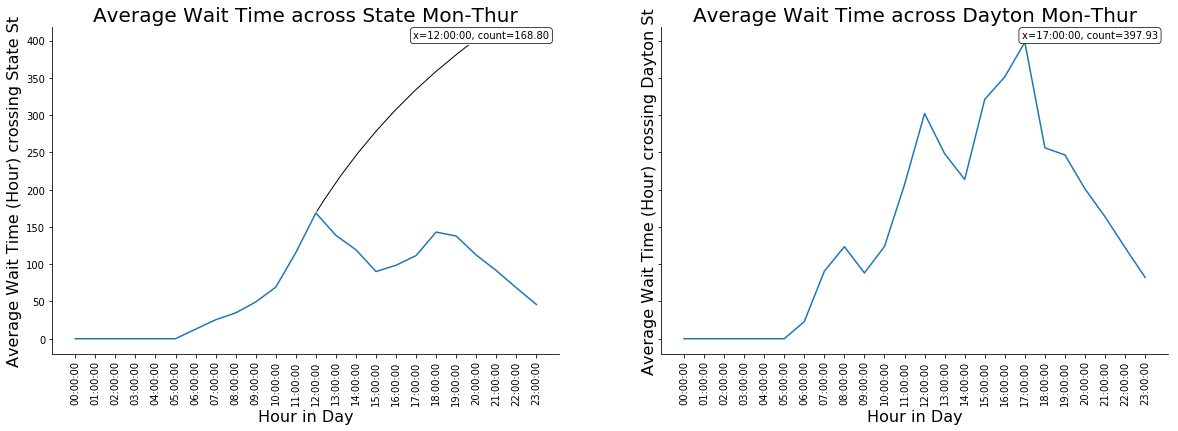

In [86]:
plot_waitTime(dayton_wait_wkd, dayton_wait_wkd.Hour, dayton_wait_wkd.total_wait_main/3600, dayton_wait_wkd.total_wait_cross/3600,
              "Average Wait Time across State Mon-Thur", "Average Wait Time across Dayton Mon-Thur")

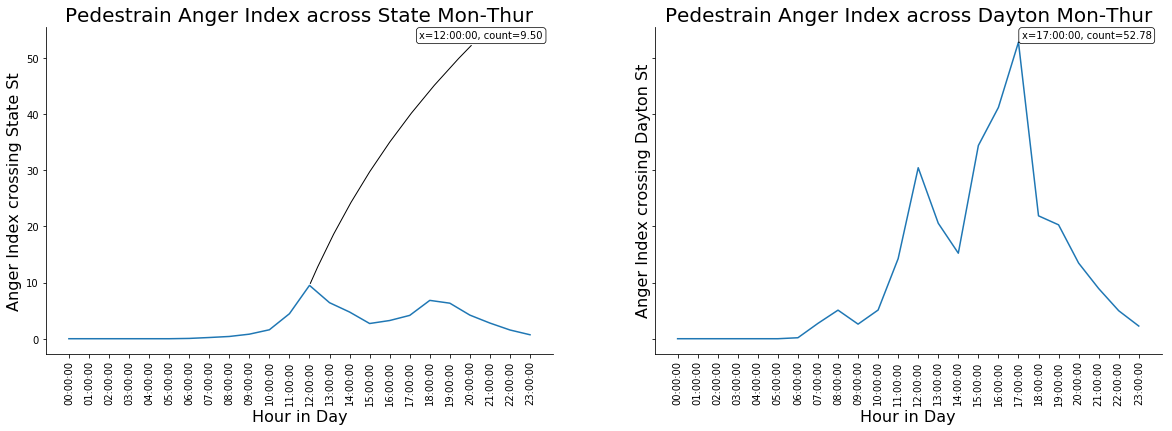

In [87]:
plot_anger(dayton_wait_wkd, dayton_wait_wkd.Hour, 
           anger_index(dayton_wait_wkd.total_wait_main/3600), anger_index(dayton_wait_wkd.total_wait_cross/3600),
              "Pedestrain Anger Index across State Mon-Thur", "Pedestrain Anger Index across Dayton Mon-Thur")

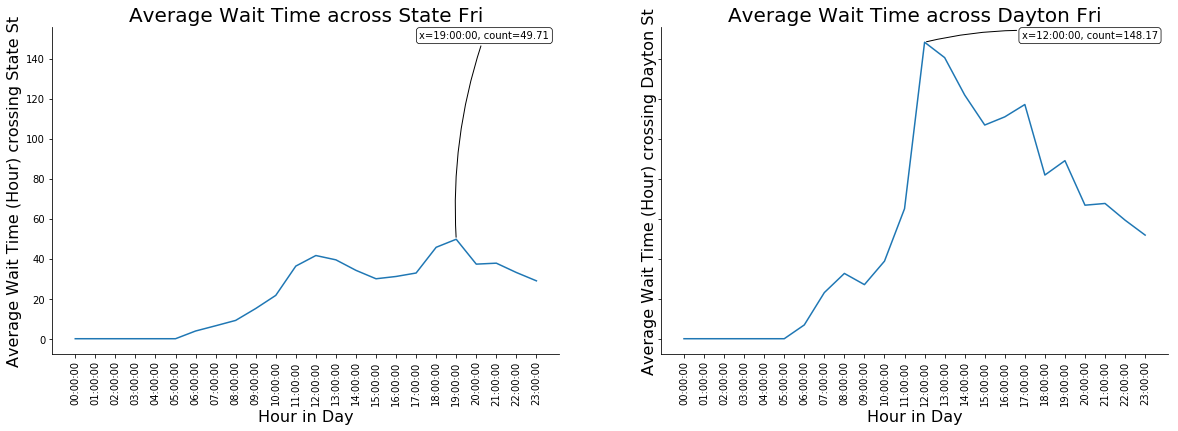

In [88]:
plot_waitTime(dayton_wait_fri, dayton_wait_fri.Hour, dayton_wait_fri.total_wait_main/3600, dayton_wait_fri.total_wait_cross/3600,
              "Average Wait Time across State Fri", "Average Wait Time across Dayton Fri")

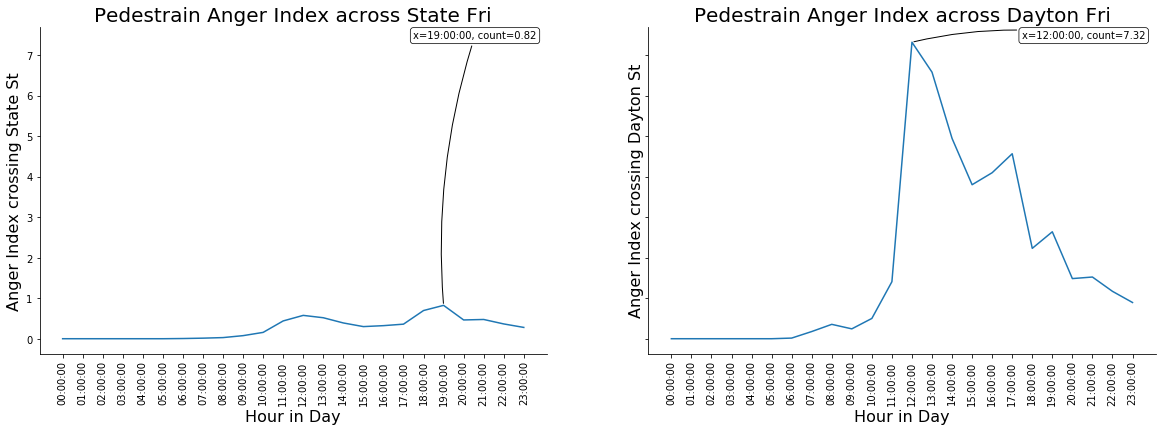

In [89]:
plot_anger(dayton_wait_fri, dayton_wait_fri.Hour, 
           anger_index(dayton_wait_fri.total_wait_main/3600), anger_index(dayton_wait_fri.total_wait_cross/3600),
              "Pedestrain Anger Index across State Fri", "Pedestrain Anger Index across Dayton Fri")

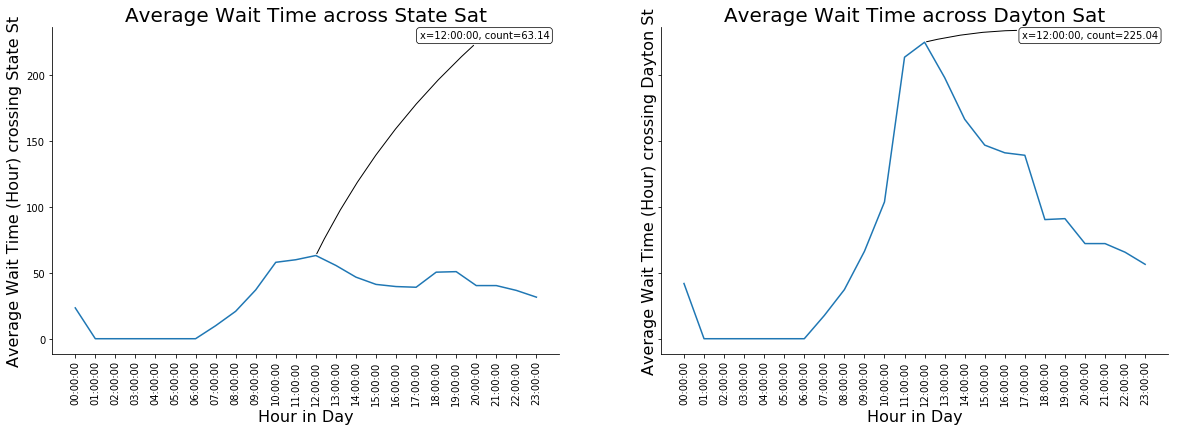

In [92]:
plot_waitTime(dayton_wait_sat, dayton_wait_sat.Hour, dayton_wait_sat.total_wait_main/3600, dayton_wait_sat.total_wait_cross/3600,
              "Average Wait Time across State Sat", "Average Wait Time across Dayton Sat")

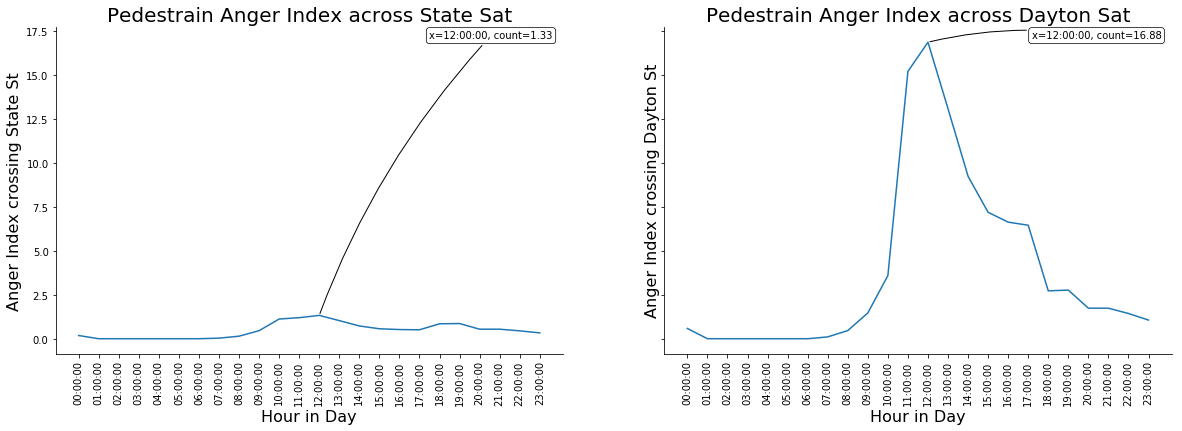

In [94]:
plot_anger(dayton_wait_sat, dayton_wait_sat.Hour, 
           anger_index(dayton_wait_sat.total_wait_main/3600), anger_index(dayton_wait_sat.total_wait_cross/3600),
              "Pedestrain Anger Index across State Sat", "Pedestrain Anger Index across Dayton Sat")

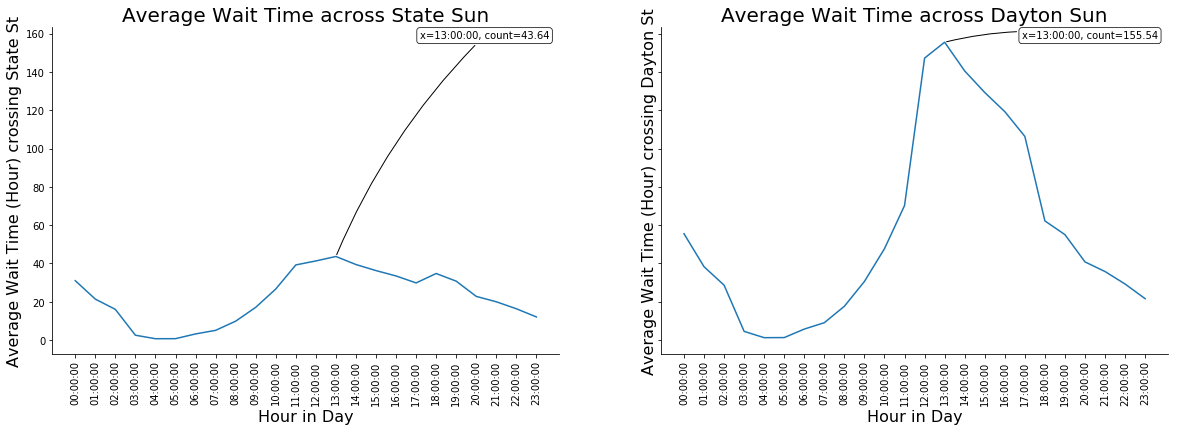

In [95]:
plot_waitTime(dayton_wait_sun, dayton_wait_sun.Hour, dayton_wait_sun.total_wait_main/3600, dayton_wait_sun.total_wait_cross/3600,
              "Average Wait Time across State Sun", "Average Wait Time across Dayton Sun")

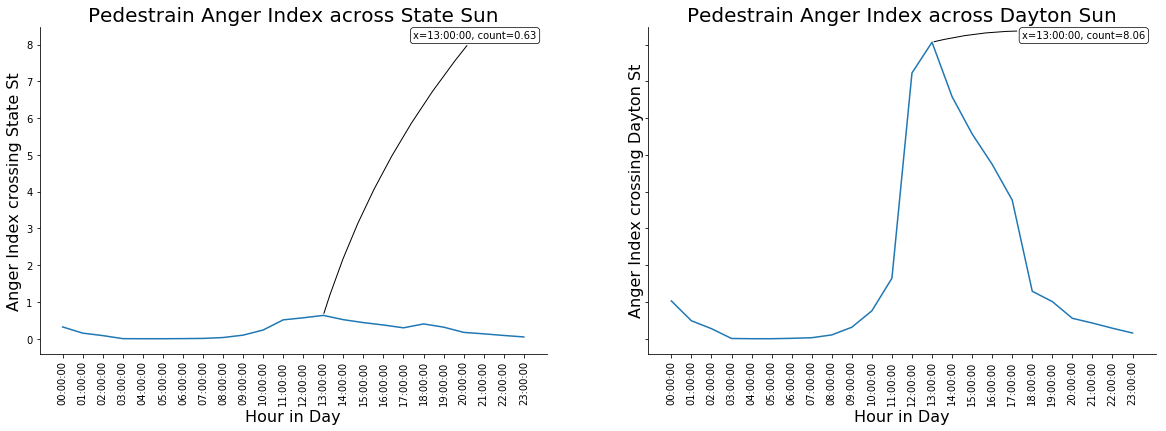

In [93]:
plot_anger(dayton_wait_sun, dayton_wait_sun.Hour, 
           anger_index(dayton_wait_sun.total_wait_main/3600), anger_index(dayton_wait_sun.total_wait_cross/3600),
              "Pedestrain Anger Index across State Sun", "Pedestrain Anger Index across Dayton Sun")

## Optimize Light Cycles 

In [96]:
from scipy.optimize import minimize

In [97]:
def cost_dayton_wkd(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = dayton_wait_wkd.Count[6:].reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
#         print(i)
#         print("wait main:", wait_main[i], " wait cross:", wait_cross[i], "")
#         print("wait_cnt:", wait_count[i])
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [98]:
WT_dayton_wkd = np.concatenate((np.array(dayton_wait_wkd['Main Street Red (s)'])[6:], 
                                np.array(dayton_wait_wkd['Cross Street Red (s)'])[6:]))
cost_dayton_wkd(WT_dayton_wkd)

357.0277784344083

In [99]:
bound = (20, 50)  # every red time must be with in [20, 50] second bounds 
bnds_18 = []
for itr in range(18*2):
    bnds_18.append(bound)
bnds_18 = tuple(bnds_18)
len(bnds_18)

36

In [100]:
res_dayton_wkd = minimize(cost_dayton_wkd, WT_dayton_wkd, method='SLSQP', 
               bounds=bnds_18, options={'xtol': 1e-8, 'disp': True})
res_dayton_wkd.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 92.24613818323083
            Iterations: 60
            Function evaluations: 2280
            Gradient evaluations: 60


array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20.])

In [101]:
cost_dayton_wkd(res_dayton_wkd.x)

92.24613818323083

In [144]:
def cost_dayton_fri(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = dayton_wait_fri.Count[6:].reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
#         print(i)
#         print("wait main:", wait_main[i], " wait cross:", wait_cross[i], "")
#         print("wait_cnt:", wait_count[i])
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [145]:
WT_dayton_fri = np.concatenate((np.array(dayton_wait_fri['Main Street Red (s)'])[6:], 
                                np.array(dayton_wait_fri['Cross Street Red (s)'])[6:]))
cost_dayton_fri(WT_dayton_fri)

50.230423961948034

In [146]:
res_dayton_fri = minimize(cost_dayton_fri, WT_dayton_fri, method='SLSQP', 
               bounds=bnds_18, options={'xtol': 1e-8, 'disp': True})
res_dayton_fri.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 10.55912433065869
            Iterations: 87
            Function evaluations: 3306
            Gradient evaluations: 87


array([30.09159653, 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 26.96374922, 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        ])

In [152]:
def cost_dayton_sat(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    tmp = pd.concat([dayton_wait_sat.Count[0:1], dayton_wait_sat.Count[7:]])
    wait_count = tmp.reset_index(drop=True)  # calculate how many pedestrian at that time
#     print(wait_count)  # delete
#     print(red_main)
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
#         print(i)
#         print("wait main:", wait_main[i], " wait cross:", wait_cross[i], "")
#         print("wait_cnt:", wait_count[i])
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [153]:
tmp1 = dayton_wait_sat['Main Street Red (s)']
t1_ = pd.concat([tmp1[0:1], tmp1[7:]])
tmp2 = dayton_wait_sat['Cross Street Red (s)']
t2_ = pd.concat([tmp2[0:1], tmp2[7:]])
WT_dayton_sat = np.concatenate((np.array(t1_), 
                                np.array(t2_)))
cost_dayton_sat(WT_dayton_sat)

103.82454955391078

In [154]:
res_dayton_sat = minimize(cost_dayton_sat, WT_dayton_sat, method='SLSQP', 
               bounds=bnds_18, options={'xtol': 1e-8, 'disp': True})
res_dayton_sat.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 20.10469474504541
            Iterations: 72
            Function evaluations: 2736
            Gradient evaluations: 72


array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20.])

In [155]:
def cost_dayton_sun(redTimeList):
    red_main, red_cross = np.split(redTimeList, 2)  # extract two variables from the whole list
    total_cycle = red_cross + red_main - 3
    wait_count = dayton_wait_sun.Count.reset_index(drop=True)  # calculate how many pedestrian at that time
    leng = len(red_main)
    assert(len(red_main) == len(red_cross))  # should be equal to 24 if no yellow flashing
    
    cost = 0
    wait_main = []
    wait_cross = []
    for i in range(leng):
        # calculate average wait time
        wait_main.append(red_main[i]**2/(2*total_cycle[i])/3600)
        wait_cross.append(red_cross[i]**2/(2*total_cycle[i])/3600)
#         print(i)
#         print("wait main:", wait_main[i], " wait cross:", wait_cross[i], "")
#         print("wait_cnt:", wait_count[i])
        cost += (wait_count[i]*3/5 * wait_main[i])**2/3000 + (wait_count[i]*4/5 * wait_cross[i])**2/3000
    
    return cost

In [156]:
WT_dayton_sun = np.concatenate((np.array(dayton_wait_sun['Main Street Red (s)']), 
                                np.array(dayton_wait_sun['Cross Street Red (s)'])))
cost_dayton_sun(WT_dayton_sun)

49.786257436630265

In [157]:
# bnds_24
bnds_24 = []
for itr in range(24*2):
    bnds_24.append(bound)
bnds_24 = tuple(bnds_24)
len(bnds_24)

48

In [158]:
res_dayton_sun = minimize(cost_dayton_sun, WT_dayton_sun, method='SLSQP', 
               bounds=bnds_24, options={'xtol': 1e-8, 'disp': True})
res_dayton_sun.x

Iteration limit exceeded    (Exit mode 9)
            Current function value: 9.638575147630009
            Iterations: 101
            Function evaluations: 5050
            Gradient evaluations: 101


array([20.        , 20.        , 20.        , 31.38137598, 31.50194096,
       31.50204346, 31.17700179, 29.61789599, 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 33.35318976, 36.24626599, 36.22441082,
       31.66891113, 26.17803926, 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.        ])